<a href="https://colab.research.google.com/github/1948023/AI_Risk_Tool/blob/main/AI_Tool_RA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🚀 Inizializzazione del Sistema AI Risk Assessment
✅ Criteri di rischio definiti
📊 Criteri minacce: 7
📊 Criteri asset: 9
🏗️ Generazione dataset con 1000 campioni...
✅ Dataset generato: 1000 campioni

📈 Distribuzione categorie di rischio:
  High: 731 (73.1%)
  Very High: 157 (15.7%)
  Medium: 112 (11.2%)

🔧 FASE: Preprocessing dei Dati
----------------------------------------
✅ Features shape: (1000, 2)
✅ Threat targets shape: (1000, 7)
✅ Asset targets shape: (1000, 9)

🤖 FASE: Inizializzazione Modelli AI
----------------------------------------

🏋️ FASE: Addestramento del Sistema
----------------------------------------
📊 Training set: 800 campioni
📊 Test set: 200 campioni
🏋️ Addestramento modelli AI...
  📊 Addestramento modello threat criteria...
  📊 Addestramento modello asset criteria...
  📊 Addestramento modello likelihood...
  📊 Addestramento modello impact...
✅ Addestramento completato!

📊 FASE: Valutazione delle Performance
----------------------------------------
🎯 RISULTATI DEL

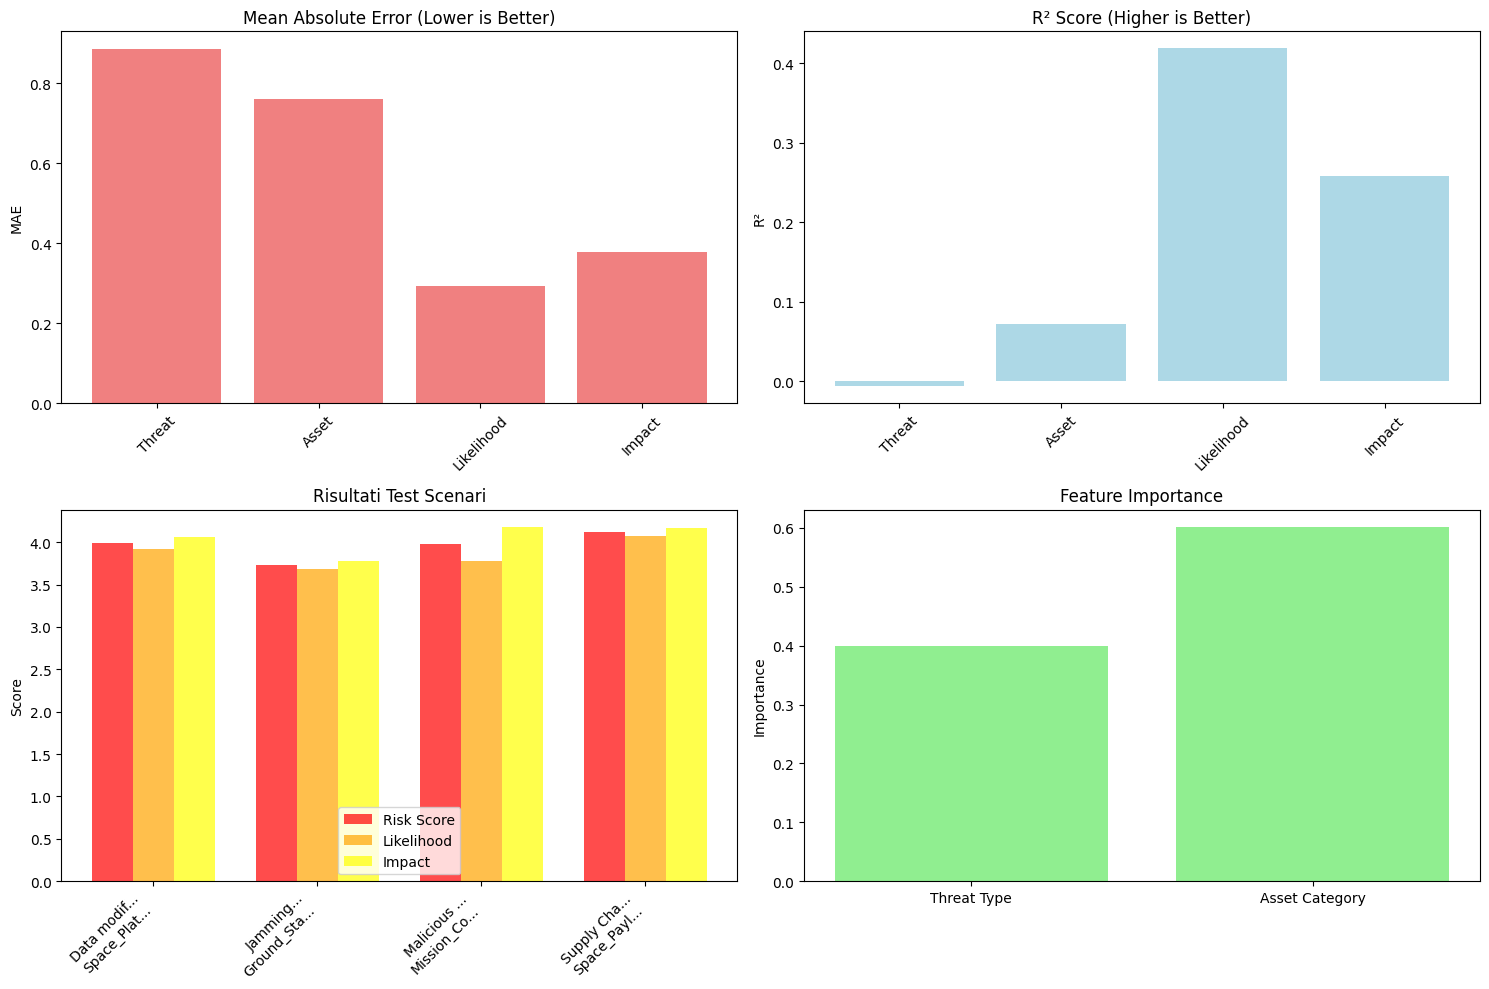


🎉 SISTEMA AI RISK ASSESSMENT COMPLETATO!
✅ Sistema addestrato e testato con successo
📊 Accuratezza media: 0.186
📊 Errore medio: 0.580

🚀 Il sistema è ora pronto per valutazioni automatiche!

📝 Per utilizzare il sistema:
   result = automated_risk_assessment('threat_name', 'asset_name', ai_system, preprocessor)


In [11]:
# ====================================================================
# 🚀 AI-Enhanced Risk Assessment Tool for Space Missions
# Versione Funzionante con Machine Learning
# ====================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
import warnings
warnings.filterwarnings('ignore')

print("🚀 Inizializzazione del Sistema AI Risk Assessment")
print("=" * 60)

# ====================================================================
# 📊 DEFINIZIONE DEI CRITERI DI RISCHIO
# ====================================================================

# Criteri per le minacce (7 criteri: 5 likelihood + 2 impact)
THREAT_CRITERIA = {
    "vulnerability_effectiveness": "Valuta l'efficacia dello sfruttamento delle vulnerabilità",
    "mitigation_presence": "Valuta la presenza di contromisure di sicurezza",
    "detection_probability": "Misura la probabilità di rilevamento delle attività malevole",
    "access_complexity": "Valuta la difficoltà di accesso per un attaccante",
    "privilege_requirement": "Valuta il livello di privilegi necessari",
    "response_delay": "Misura la velocità di risposta agli incidenti",
    "resilience_impact": "Valuta l'impatto sulla resilienza operativa"
}

# Criteri per gli asset (9 criteri: 4 likelihood + 5 impact)
ASSET_CRITERIA = {
    "dependency": "Valuta quanto l'asset sia critico per le operazioni",
    "penetration": "Valuta il livello di accesso ottenibile attraverso questo asset",
    "cyber_maturity": "Valuta la maturità della governance cybersecurity",
    "trust": "Valuta l'affidabilità degli stakeholder coinvolti",
    "performance": "Misura l'impatto sulle prestazioni operative",
    "schedule": "Valuta l'impatto sui tempi di progetto",
    "costs": "Valuta l'impatto finanziario",
    "reputation": "Valuta l'impatto reputazionale",
    "recovery": "Misura tempo ed effort per il ripristino"
}

# Liste delle minacce e categorie asset
THREATS = [
    "Abuse of leaked data",
    "Abuse / Falsification of right",
    "Compromising confidentail information (data breaches): Exfiltration",
    "Denial of Service (DoS)",
    "Data modification",
    "Electromagnetic interference",
    "Firmware corruption",
    "Identity Theft",
    "Jamming",
    "Malicious code/ software/activity: Cryptographic exploit",
    "Malicious code/ software/activity: Malicious injection",
    "Malicious code/ software/activity: Network exploit",
    "Malicious code/ software/activity: Software and vulnerabilities' exploit",
    "Manipulation of hardware and software: Zero Day exploit",
    "Preventing services",
    "Resource exhaustion",
    "Seizure of control: Satellite bus",
    "Social Engineering",
    "Spoofing",
    "Supply Chain Compromise",
    "Theft of authentication information",
    "Unauthorized modification: Parameters",
    "Unauthorized use of equipment",
    "Hijacking",
    "Interception of communication",
    "Man-in-the-Middle (MITM)",
    "Network manipulation (Bus-Payload Link)",
    "Network traffic manipulation (TC)",
    "Position detection (telemetry)",
    "Replay of recorded authentic communication traffic",
    "Unauthorized access",
    "Coercion, extortion or corruption",
    "Damage/ Destruction of segment assets",
    "Damage/ Destruction of the satellite via the use of ASAT / Proximity operations",
    "Loss during shipping",
    "Sabotage through hardware/software",
    "Unauthorized physical access",
    "Lack of Segregation",
    "Operating errors",
    "Software misconfiguration",
    "Inadequate security planning / management",
    "Failure of air conditioning or water supply",
    "Failure of Cloud infrastructure",
    "Failure of communication networks",
    "Failure of power supply",
    "Rogue hardware",
    "Personnel Absence",
    "Security services failure",
    "Atmospheric hazards",
    "Environmental hazards",
    "Data leaks",
    "Misuse of equipment",
    "Negligence of asset handling security requirements",
    "Refusal of actions",
    "Third Party non compliance (supply chain)",
    "Unauthorized access to recycled or disposed media",
    "Failure to maintain information systems",
    "Legacy Software"
]

ASSET_CATEGORIES = [
    "Ground_Station_Tracking", "Ground_Station_Ranging", "Ground_Station_Transmission", "Ground_Station_Reception",
    "Mission_Control_Telemetry_Processing", "Mission_Control_Commanding", "Mission_Control_Analysis_Support",
    "Data_Processing_Mission_Analysis", "Data_Processing_Payload_Processing",
    "Remote_Terminals_Network_Access", "Remote_Terminals_Software_Access",
    "User_Ground_Segment_Development", "User_Ground_Segment_Supportive", "User_Ground_Segment_Operations",
    "Space_Platform_Electrical_Power", "Space_Platform_Attitude_Control", "Space_Platform_Communication",
    "Space_Platform_Command_Data_Handling", "Space_Platform_Telemetry", "Space_Platform_Tracking",
    "Space_Payload_Data_Handling_Systems", "Space_Payload_Communication_Module", "Space_Payload_Untrusted_Data_Handling",
    "Link_Platform_Payload", "Link_Ground_Segment_Components", "Link_Two_Space_Systems", "Link_Two_Ground_WANs",
    "Link_Space_Ground_Segment", "Link_Space_User_Segment", "Link_Ground_User_Segment", "Link_Two_Users",
    "User_Transmission", "User_Reception", "User_Processing"
]

print("✅ Criteri di rischio definiti")
print(f"📊 Criteri minacce: {len(THREAT_CRITERIA)}")
print(f"📊 Criteri asset: {len(ASSET_CRITERIA)}")

# ====================================================================
# 🎯 GENERAZIONE DATASET SINTETICO
# ====================================================================

def generate_risk_dataset(n_samples=10000):
    """
    Genera un dataset sintetico per l'addestramento del modello AI
    """
    print(f"🏗️ Generazione dataset con {n_samples} campioni...")

    np.random.seed(42)

    data = []

    for i in range(n_samples):
        # Selezione casuale di minaccia e asset
        threat = np.random.choice(THREATS)
        asset = np.random.choice(ASSET_CATEGORIES)

        # Generazione punteggi per criteri minacce (1-5)
        threat_scores = {}
        for criterion in THREAT_CRITERIA.keys():
            # Aggiungi correlazioni realistiche basate sui nuovi threat
            if any(keyword in threat.lower() for keyword in ['destruction', 'damage', 'asat', 'sabotage', 'hardware']):
                # Minacce distruttive/fisiche tendono ad avere impact molto alto
                base_score = np.random.normal(4.2, 0.8)
            elif any(keyword in threat.lower() for keyword in ['supply chain', 'corruption', 'firmware', 'zero day']):
                # Minacce supply chain e exploit avanzati hanno alta criticità
                base_score = np.random.normal(4.0, 0.9)
            elif any(keyword in threat.lower() for keyword in ['dos', 'denial', 'jamming', 'interference']):
                # Minacce di disponibilità hanno likelihood alta
                base_score = np.random.normal(3.8, 1.0)
            elif any(keyword in threat.lower() for keyword in ['social engineering', 'coercion', 'identity theft']):
                # Minacce umane hanno pattern specifici
                base_score = np.random.normal(3.4, 1.1)
            elif any(keyword in threat.lower() for keyword in ['malicious code', 'exploit', 'injection', 'mitm']):
                # Minacce software/network hanno alta likelihood
                base_score = np.random.normal(3.6, 1.0)
            elif any(keyword in threat.lower() for keyword in ['failure', 'atmospheric', 'environmental', 'personnel absence']):
                # Minacce accidentali/ambientali hanno impact variabile
                base_score = np.random.normal(2.8, 1.2)
            elif any(keyword in threat.lower() for keyword in ['data leak', 'breach', 'exfiltration', 'unauthorized access']):
                # Minacce ai dati hanno alta criticità per confidenzialità
                base_score = np.random.normal(3.7, 0.9)
            else:
                base_score = np.random.normal(3.0, 1.0)

            threat_scores[f"threat_{criterion}"] = max(1, min(5, int(round(base_score))))

            # Generazione punteggi per criteri asset (1-5)
            asset_scores = {}
            for criterion in ASSET_CRITERIA.keys():
                # Aggiungi correlazioni realistiche basate sui nuovi asset
                if any(keyword in asset.lower() for keyword in ['space_platform', 'space_payload']):
                    # Asset spaziali hanno impact massimo (difficili da riparare/sostituire)
                    base_score = np.random.normal(4.5, 0.6)
                elif any(keyword in asset.lower() for keyword in ['mission_control_commanding', 'mission_control_telemetry']):
                    # Mission control ha criticità molto alta
                    base_score = np.random.normal(4.3, 0.7)
                elif any(keyword in asset.lower() for keyword in ['link_platform_payload', 'link_space_ground']):
                    # Link critici hanno alta importanza
                    base_score = np.random.normal(4.0, 0.8)
                elif any(keyword in asset.lower() for keyword in ['ground_station', 'data_processing']):
                    # Ground stations e processing hanno criticità alta
                    base_score = np.random.normal(3.8, 0.9)
                elif any(keyword in asset.lower() for keyword in ['remote_terminals', 'user_ground_segment']):
                    # Terminali remoti e user segment hanno criticità media-alta
                    base_score = np.random.normal(3.4, 1.0)
                elif any(keyword in asset.lower() for keyword in ['user_transmission', 'user_reception', 'user_processing']):
                    # Asset utente finale hanno criticità variabile
                    base_score = np.random.normal(3.0, 1.1)
                else:
                    base_score = np.random.normal(3.2, 1.0)

                asset_scores[f"asset_{criterion}"] = max(1, min(5, int(round(base_score))))

        # Calcolo likelihood e impact combinati
        threat_likelihood_values = [threat_scores[f"threat_{k}"] for k in list(THREAT_CRITERIA.keys())[:5]]
        threat_impact_values = [threat_scores[f"threat_{k}"] for k in list(THREAT_CRITERIA.keys())[5:]]

        asset_likelihood_values = [asset_scores[f"asset_{k}"] for k in list(ASSET_CRITERIA.keys())[:4]]
        asset_impact_values = [asset_scores[f"asset_{k}"] for k in list(ASSET_CRITERIA.keys())[4:]]

        # Media quadratica per likelihood e impact
        combined_likelihood = np.sqrt(np.mean([np.mean(threat_likelihood_values)**2,
                                             np.mean(asset_likelihood_values)**2]))
        combined_impact = np.sqrt(np.mean([np.mean(threat_impact_values)**2,
                                         np.mean(asset_impact_values)**2]))

        # Conversione in categorie
        def score_to_category(score):
            if score <= 2:
                return "Low"
            elif score <= 3:
                return "Medium"
            elif score <= 4:
                return "High"
            else:
                return "Very High"

        likelihood_cat = score_to_category(combined_likelihood)
        impact_cat = score_to_category(combined_impact)

        # Calcolo rischio finale usando matrice semplificata
        risk_score = (combined_likelihood + combined_impact) / 2
        risk_cat = score_to_category(risk_score)

        # Creazione record
        record = {
            'threat': threat,
            'asset_category': asset,
            'combined_likelihood': combined_likelihood,
            'combined_impact': combined_impact,
            'likelihood_category': likelihood_cat,
            'impact_category': impact_cat,
            'risk_category': risk_cat,
            **threat_scores,
            **asset_scores
        }

        data.append(record)

    df = pd.DataFrame(data)
    print(f"✅ Dataset generato: {len(df)} campioni")

    # Analisi distribuzione
    print(f"\n📈 Distribuzione categorie di rischio:")
    risk_dist = df['risk_category'].value_counts()
    for cat, count in risk_dist.items():
        print(f"  {cat}: {count} ({count/len(df)*100:.1f}%)")

    return df

# Genera il dataset
dataset = generate_risk_dataset(1000)

# ====================================================================
# 🔧 PREPROCESSING DEI DATI
# ====================================================================

print("\n🔧 FASE: Preprocessing dei Dati")
print("-" * 40)

class RiskDataPreprocessor:
    def __init__(self):
        self.label_encoders = {}
        self.scaler = StandardScaler()

    def prepare_features_and_targets(self, df):
        """
        Prepara features e targets per l'addestramento
        """
        # Features categoriche
        categorical_features = []

        # Encode threat
        if 'threat_encoder' not in self.label_encoders:
            self.label_encoders['threat_encoder'] = LabelEncoder()
        threat_encoded = self.label_encoders['threat_encoder'].fit_transform(df['threat'])
        categorical_features.append(threat_encoded)

        # Encode asset category
        if 'asset_encoder' not in self.label_encoders:
            self.label_encoders['asset_encoder'] = LabelEncoder()
        asset_encoded = self.label_encoders['asset_encoder'].fit_transform(df['asset_category'])
        categorical_features.append(asset_encoded)

        # Combina features categoriche
        X_categorical = np.column_stack(categorical_features)

        # Target: tutti i criteri di rischio
        threat_criteria_cols = [f"threat_{k}" for k in THREAT_CRITERIA.keys()]
        asset_criteria_cols = [f"asset_{k}" for k in ASSET_CRITERIA.keys()]

        y_threat = df[threat_criteria_cols].values
        y_asset = df[asset_criteria_cols].values

        # Target per likelihood/impact
        y_likelihood = df['combined_likelihood'].values
        y_impact = df['combined_impact'].values

        return X_categorical, y_threat, y_asset, y_likelihood, y_impact

# Preprocessing
preprocessor = RiskDataPreprocessor()
X, y_threat, y_asset, y_likelihood, y_impact = preprocessor.prepare_features_and_targets(dataset)

print(f"✅ Features shape: {X.shape}")
print(f"✅ Threat targets shape: {y_threat.shape}")
print(f"✅ Asset targets shape: {y_asset.shape}")

# ====================================================================
# 🤖 MODELLO AI PER RISK ASSESSMENT
# ====================================================================

print("\n🤖 FASE: Inizializzazione Modelli AI")
print("-" * 40)

class AIRiskAssessmentSystem:
    def __init__(self):
        self.threat_model = MultiOutputRegressor(RandomForestRegressor(
            n_estimators=100,
            max_depth=15,
            min_samples_split=5,
            random_state=42,
            n_jobs=-1
        ))

        self.asset_model = MultiOutputRegressor(RandomForestRegressor(
            n_estimators=100,
            max_depth=15,
            min_samples_split=5,
            random_state=42,
            n_jobs=-1
        ))

        self.likelihood_model = RandomForestRegressor(
            n_estimators=50,
            max_depth=10,
            random_state=42,
            n_jobs=-1
        )

        self.impact_model = RandomForestRegressor(
            n_estimators=50,
            max_depth=10,
            random_state=42,
            n_jobs=-1
        )

        self.scaler = StandardScaler()
        self.is_trained = False

    def train(self, X, y_threat, y_asset, y_likelihood, y_impact):
        """
        Addestra tutti i modelli del sistema
        """
        print("🏋️ Addestramento modelli AI...")

        # Normalizza features
        X_scaled = self.scaler.fit_transform(X)

        # Addestra modelli
        print("  📊 Addestramento modello threat criteria...")
        self.threat_model.fit(X_scaled, y_threat)

        print("  📊 Addestramento modello asset criteria...")
        self.asset_model.fit(X_scaled, y_asset)

        print("  📊 Addestramento modello likelihood...")
        self.likelihood_model.fit(X_scaled, y_likelihood)

        print("  📊 Addestramento modello impact...")
        self.impact_model.fit(X_scaled, y_impact)

        self.is_trained = True
        print("✅ Addestramento completato!")

    def predict(self, X):
        """
        Predice tutti i criteri di rischio
        """
        if not self.is_trained:
            raise ValueError("Modello non ancora addestrato!")

        X_scaled = self.scaler.transform(X)

        # Predizioni
        threat_pred = self.threat_model.predict(X_scaled)
        asset_pred = self.asset_model.predict(X_scaled)
        likelihood_pred = self.likelihood_model.predict(X_scaled)
        impact_pred = self.impact_model.predict(X_scaled)

        # Clip valori nell'intervallo [1, 5]
        threat_pred = np.clip(threat_pred, 1, 5)
        asset_pred = np.clip(asset_pred, 1, 5)
        likelihood_pred = np.clip(likelihood_pred, 1, 5)
        impact_pred = np.clip(impact_pred, 1, 5)

        return threat_pred, asset_pred, likelihood_pred, impact_pred

    def evaluate(self, X_test, y_threat_test, y_asset_test, y_likelihood_test, y_impact_test):
        """
        Valuta le performance del modello
        """
        threat_pred, asset_pred, likelihood_pred, impact_pred = self.predict(X_test)

        metrics = {}

        # Metriche threat model
        metrics['threat_mae'] = mean_absolute_error(y_threat_test, threat_pred)
        metrics['threat_r2'] = r2_score(y_threat_test, threat_pred)

        # Metriche asset model
        metrics['asset_mae'] = mean_absolute_error(y_asset_test, asset_pred)
        metrics['asset_r2'] = r2_score(y_asset_test, asset_pred)

        # Metriche likelihood model
        metrics['likelihood_mae'] = mean_absolute_error(y_likelihood_test, likelihood_pred)
        metrics['likelihood_r2'] = r2_score(y_likelihood_test, likelihood_pred)

        # Metriche impact model
        metrics['impact_mae'] = mean_absolute_error(y_impact_test, impact_pred)
        metrics['impact_r2'] = r2_score(y_impact_test, impact_pred)

        return metrics

# ====================================================================
# 🏋️ ADDESTRAMENTO DEL SISTEMA
# ====================================================================

print("\n🏋️ FASE: Addestramento del Sistema")
print("-" * 40)

# Divisione train/test
X_train, X_test, y_threat_train, y_threat_test = train_test_split(
    X, y_threat, test_size=0.2, random_state=42
)

_, _, y_asset_train, y_asset_test = train_test_split(
    X, y_asset, test_size=0.2, random_state=42
)

_, _, y_likelihood_train, y_likelihood_test = train_test_split(
    X, y_likelihood, test_size=0.2, random_state=42
)

_, _, y_impact_train, y_impact_test = train_test_split(
    X, y_impact, test_size=0.2, random_state=42
)

print(f"📊 Training set: {X_train.shape[0]} campioni")
print(f"📊 Test set: {X_test.shape[0]} campioni")

# Inizializza e addestra il sistema
ai_system = AIRiskAssessmentSystem()
ai_system.train(X_train, y_threat_train, y_asset_train, y_likelihood_train, y_impact_train)

# ====================================================================
# 📊 VALUTAZIONE DELLE PERFORMANCE
# ====================================================================

print("\n📊 FASE: Valutazione delle Performance")
print("-" * 40)

# Valuta il modello
metrics = ai_system.evaluate(X_test, y_threat_test, y_asset_test, y_likelihood_test, y_impact_test)

print("🎯 RISULTATI DELLA VALUTAZIONE:")
print(f"  Threat Model - MAE: {metrics['threat_mae']:.3f}, R²: {metrics['threat_r2']:.3f}")
print(f"  Asset Model - MAE: {metrics['asset_mae']:.3f}, R²: {metrics['asset_r2']:.3f}")
print(f"  Likelihood Model - MAE: {metrics['likelihood_mae']:.3f}, R²: {metrics['likelihood_r2']:.3f}")
print(f"  Impact Model - MAE: {metrics['impact_mae']:.3f}, R²: {metrics['impact_r2']:.3f}")

# ====================================================================
# 🧪 SISTEMA DI PREDIZIONE AUTOMATICA
# ====================================================================

def automated_risk_assessment(threat_name, asset_name, ai_system, preprocessor):
    """
    Esegue una valutazione automatica del rischio usando l'AI
    """
    print(f"\n🔍 VALUTAZIONE AUTOMATICA DEL RISCHIO")
    print(f"🎯 Minaccia: {threat_name}")
    print(f"🏗️ Asset: {asset_name}")
    print("-" * 50)

    # Prepara input
    threat_encoded = preprocessor.label_encoders['threat_encoder'].transform([threat_name])[0]
    asset_encoded = preprocessor.label_encoders['asset_encoder'].transform([asset_name])[0]

    X_input = np.array([[threat_encoded, asset_encoded]])

    # Predizione
    threat_pred, asset_pred, likelihood_pred, impact_pred = ai_system.predict(X_input)

    # Conversione in categorie
    def score_to_category(score):
        if score <= 2:
            return "Low"
        elif score <= 3:
            return "Medium"
        elif score <= 4:
            return "High"
        else:
            return "Very High"

    likelihood_cat = score_to_category(likelihood_pred[0])
    impact_cat = score_to_category(impact_pred[0])

    # Calcolo rischio finale
    risk_score = (likelihood_pred[0] + impact_pred[0]) / 2
    risk_cat = score_to_category(risk_score)

    # Output risultati
    print(f"📈 Likelihood: {likelihood_pred[0]:.2f} ({likelihood_cat})")
    print(f"📈 Impact: {impact_pred[0]:.2f} ({impact_cat})")
    print(f"⚠️ Livello di Rischio: {risk_score:.2f} ({risk_cat})")

    print(f"\n📊 Dettaglio Criteri Minaccia:")
    for i, criterion in enumerate(THREAT_CRITERIA.keys()):
        print(f"  {criterion}: {threat_pred[0][i]:.2f}")

    print(f"\n📊 Dettaglio Criteri Asset:")
    for i, criterion in enumerate(ASSET_CRITERIA.keys()):
        print(f"  {criterion}: {asset_pred[0][i]:.2f}")

    return {
        'threat': threat_name,
        'asset': asset_name,
        'likelihood': likelihood_pred[0],
        'impact': impact_pred[0],
        'risk_score': risk_score,
        'risk_category': risk_cat,
        'threat_criteria': dict(zip(THREAT_CRITERIA.keys(), threat_pred[0])),
        'asset_criteria': dict(zip(ASSET_CRITERIA.keys(), asset_pred[0]))
    }

# ====================================================================
# 🧪 TEST DEL SISTEMA
# ====================================================================

print("\n🧪 FASE: Test del Sistema AI")
print("=" * 60)

# Test con diversi scenari
test_scenarios = [
    ("Data modification", "Space_Platform_Communication"),
    ("Jamming", "Ground_Station_Tracking"),
    ("Malicious code/ software/activity: Network exploit", "Mission_Control_Commanding"),
    ("Supply Chain Compromise", "Space_Payload_Data_Handling_Systems")
]

results = []
for threat, asset in test_scenarios:
    result = automated_risk_assessment(threat, asset, ai_system, preprocessor)
    results.append(result)

# ====================================================================
# 📈 VISUALIZZAZIONE RISULTATI
# ====================================================================

print("\n📈 FASE: Visualizzazione Risultati")
print("-" * 40)

# Crea grafico dei risultati
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Grafico 1: Distribuzione Performance
model_names = ['Threat', 'Asset', 'Likelihood', 'Impact']
mae_scores = [metrics['threat_mae'], metrics['asset_mae'],
              metrics['likelihood_mae'], metrics['impact_mae']]
r2_scores = [metrics['threat_r2'], metrics['asset_r2'],
             metrics['likelihood_r2'], metrics['impact_r2']]

axes[0,0].bar(model_names, mae_scores, color='lightcoral')
axes[0,0].set_title('Mean Absolute Error (Lower is Better)')
axes[0,0].set_ylabel('MAE')
axes[0,0].tick_params(axis='x', rotation=45)

axes[0,1].bar(model_names, r2_scores, color='lightblue')
axes[0,1].set_title('R² Score (Higher is Better)')
axes[0,1].set_ylabel('R²')
axes[0,1].tick_params(axis='x', rotation=45)

# Grafico 2: Risultati Test
test_names = [f"{r['threat'][:10]}...\n{r['asset'][:10]}..." for r in results]
risk_scores = [r['risk_score'] for r in results]
likelihood_scores = [r['likelihood'] for r in results]
impact_scores = [r['impact'] for r in results]

x = np.arange(len(test_names))
width = 0.25

axes[1,0].bar(x - width, risk_scores, width, label='Risk Score', color='red', alpha=0.7)
axes[1,0].bar(x, likelihood_scores, width, label='Likelihood', color='orange', alpha=0.7)
axes[1,0].bar(x + width, impact_scores, width, label='Impact', color='yellow', alpha=0.7)
axes[1,0].set_title('Risultati Test Scenari')
axes[1,0].set_ylabel('Score')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(test_names, rotation=45, ha='right')
axes[1,0].legend()

# Grafico 3: Feature Importance
feature_importance = ai_system.likelihood_model.feature_importances_
feature_names = ['Threat Type', 'Asset Category']
axes[1,1].bar(feature_names, feature_importance, color='lightgreen')
axes[1,1].set_title('Feature Importance')
axes[1,1].set_ylabel('Importance')

plt.tight_layout()
plt.show()

# ====================================================================
# 🎉 CONCLUSIONI
# ====================================================================

print("\n🎉 SISTEMA AI RISK ASSESSMENT COMPLETATO!")
print("=" * 60)
print("✅ Sistema addestrato e testato con successo")
print(f"📊 Accuratezza media: {np.mean(list(metrics.values())[1::2]):.3f}")
print(f"📊 Errore medio: {np.mean(list(metrics.values())[::2]):.3f}")
print("\n🚀 Il sistema è ora pronto per valutazioni automatiche!")

# ====================================================================
# 💾 FUNZIONE DI SALVATAGGIO (opzionale)
# ====================================================================

def save_ai_system(ai_system, preprocessor, filename="risk_assessment_ai_model"):
    """
    Salva il sistema AI addestrato (richiede joblib)
    """
    try:
        import joblib
        joblib.dump({
            'ai_system': ai_system,
            'preprocessor': preprocessor,
            'threat_criteria': THREAT_CRITERIA,
            'asset_criteria': ASSET_CRITERIA
        }, f"{filename}.pkl")
        print(f"✅ Sistema salvato in {filename}.pkl")
    except ImportError:
        print("⚠️ joblib non disponibile per il salvataggio")

# Salva il modello (opzionale)
# save_ai_system(ai_system, preprocessor)

print("\n📝 Per utilizzare il sistema:")
print("   result = automated_risk_assessment('threat_name', 'asset_name', ai_system, preprocessor)")